<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Teoría de Circuitos II

# TRABAJO PRACTICO LABORATORIO
#### Autor: RICARDO RELOZ


# #Ejercicio:

## 1) Realizar el ejercicio 4 del TP5 de Filtros digitales.

## 2) Se dispone del siguiente filtro digital:

<img src="./circuito2.png" align="left" width="300" /> 


### a) Para la transferencia del filtro con M = 2 y α=0.8; calcular 1) el diagrama de polos y ceros y la respuesta en frecuencia de 2) módulo, 3) fase y 4) retardo de grupo.
### b) Si quisiéramos anular una senoidal interferente de 125 Hz y su armónica de 375 Hz y sólo dispone de un sumador y el filtro de la figura con M = 4. Proponga un esquema de la solución y calcule los parámetros del filtro que sería necesario adecuar.


## EJERCICIO 1
### Calculo de transferencia
<img src="./ej1foto1.jpeg" align="left" width="600" /> 
<img src="./ej1foto2.jpeg" align="left" width="600" /> 
<img src="./ej1foto3.jpeg" align="left" width="600" /> 

## EJERCICIO 1 Parte B Filtro de Media Movil
### Calculo de H(Z)
<img src="./ej1foto4.jpeg" align="left" width="600" /> 
<img src="./ej1foto5.jpeg" align="left" width="600" /> 

### ¿Es un filtro IIR o FIR?
Este filtro es IIR (Infinite Impulse Response).
Razón:
El denominador introduce realimentación, lo que significa que la respuesta impulsional del filtro tiene una duración infinita. Cualquier filtro con realimentación, es decir, una dependencia de las salidas pasadas en el denominador de su función de transferencia, se clasifica como IIR.

### Discuta las ventajas que tendría esta implementación respecto al filtro FIR de media móvil.
Reducción de Cómputo: Un filtro IIR generalmente requiere menos coeficientes para lograr un rendimiento similar al de un filtro FIR. En este caso, el filtro IIR logra una media móvil (suavizado) con menor costo computacional debido a su estructura recursiva.

Eficiencia de Memoria: Los filtros IIR pueden realizar operaciones equivalentes con un número menor de coeficientes y menos memoria, ya que utilizan realimentación.

Respuesta Similar con Menos Orden: Para una media móvil, el filtro IIR puede proporcionar una respuesta similar a un FIR de media móvil, pero con una estructura más compacta en términos de coeficientes.

### ¿Podría implementar el siguiente sistema h(k) = (1,1,1,1,1,1,1) con esta topología ?
Respuesta:

No, no se puede implementar exactamente la secuencia h(k)=(1,1,1,1,1,1,1)h(k)=(1,1,1,1,1,1,1) con esta topología.
Razón:

    El sistema h(k)=(1,1,1,1,1,1,1)h(k)=(1,1,1,1,1,1,1) corresponde a un filtro FIR con coeficientes iguales a 1, lo que implica una duración finita de la respuesta impulsional. Este es un filtro FIR de orden 6 (7 coeficientes).

    El filtro H(Z) es un filtro IIR que tiene una respuesta infinita debido a la realimentación en el denominador. Aunque puede aproximarse a una media móvil, la respuesta será diferente debido a la influencia de la realimentación.

Para implementar exactamente la secuencia h(k)=(1,1,1,1,1,1,1), se necesita una topología FIR pura sin realimentación, como un filtro FIR de media móvil con coeficientes iguales a 1 y un denominador trivial (1).

## EJERCICIO 1 Parte C Filtro Diferenciador
### Calculo de H(Z)
<img src="./ej1foto6.jpeg" align="left" width="600" /> 

## EJERCICIO 1 Parte D Integrador con Perdidas
### Calculo de H(Z)
<img src="./ej1foto12.jpeg" align="left" width="600" /> 

## EJERCICIO 1 Parte E Integrador con Perdidas
### Calculo de H(Z)
La resolucion muestra a alfa como un valor complejo, debido a que el FILTRO esta actuando como un pasatodo, no se puede hallar -3dB a menos que alfa sea de valor compleja
<img src="./ej1foto9.jpeg" align="left" width="600" /> 
<img src="./ej1foto10.jpeg" align="left" width="600" /> 
<img src="./ej1foto11.jpeg" align="left" width="600" /> 

## EJERCICIO 1 Parte F Filtro Ecualizdor de fase de 1er orden
### Calculo de H(Z)
<img src="./ej1foto13.jpeg" align="left" width="600" /> 
<img src="./ej1foto14.jpeg" align="left" width="600" /> 
<img src="./ej1foto15.jpeg" align="left" width="600" /> 
<img src="./ej1foto16.jpeg" align="left" width="600" /> 
<img src="./ej1foto17.jpeg" align="left" width="600" /> 
<img src="./ej1foto18.jpeg" align="left" width="600" /> 

## EJERCICIO 2 Calcular H(Z)
<img src="./ej1foto19.jpeg" align="left" width="600" /> 
<img src="./ej1foto20.jpeg" align="left" width="600" /> 

## EJERCICIO 2 Parte B
<img src="./ej1foto23.jpeg" align="left" width="600" /> 
<img src="./ej1foto24.jpeg" align="left" width="600" /> 

### Simulacion en SPYDER EJERCICIO 1

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import sympy as sp
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

# Gráficos interactivos
# %matplotlib ipympl
# Gráficos estáticos
#%matplotlib inline
##############################################################################
# Desarrollo H(Z)
##############################################################################

from pytc2.sistemas_lineales import group_delay, analyze_sys, plot_plantilla
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s

from sympy import symbols, Matrix
from sympy import init_printing

from scipy.signal import TransferFunction
import matplotlib.pyplot as plt

# Librería de TC2, esta la vas a usar mucho
from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot


init_printing()  # Inicializa la impresión en Jupyter

plt.close('all')

all_sys = []
all_sys_desc = []

w0 = 1
qq1 = np.sqrt(2)/2


# Definimos la variable Z
z = sp.symbols('z')

# Parámetros
N_values = ([3, 4, 5])


# Definir la función de transferencia para cada valor de N
for N in N_values:    
    a0 = 1
    a1 = 1
    a2 = 0

    b0 = 1 / N
    b1 = 0
    b2 = 0

    c1 = 1
    
    N = sp.expand(1 - c1 * z**(-N)) * (b0*(z*z) + b1*z + b2) 
    D = sp.expand(z*z / a0 - a1*z - a2)
    
    H_simplified = sp.simplify(N/D)
    
    
    print_latex(a_equal_b_latex_s('H', H_simplified))
    
    num, den = sp.fraction(H_simplified)

    num = sp.Poly(num,z)
    den = sp.Poly(den,z)
    
    numz = np.array(num.all_coeffs()).astype(np.float64)
    denz = np.array(den.all_coeffs()).astype(np.float64)
    
    my_df = sig.TransferFunction(numz, denz, dt=1/N)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

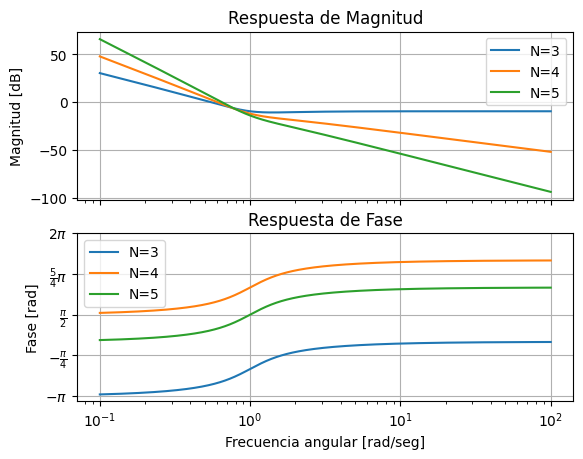

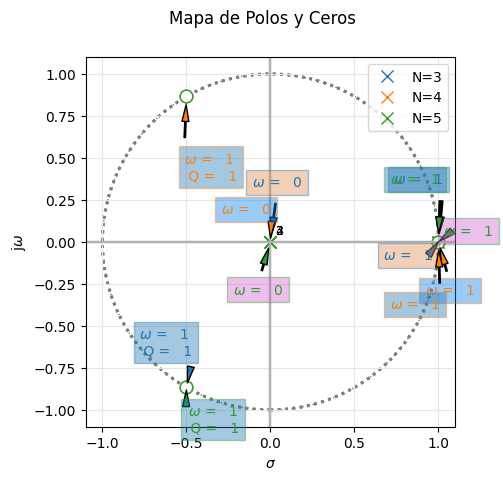

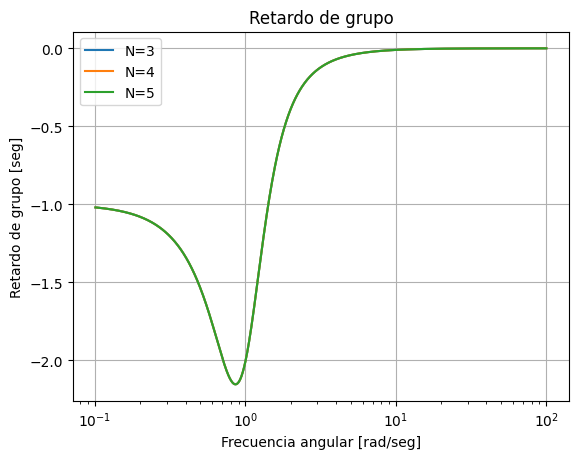

In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import sympy as sp
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

# Gráficos interactivos
# %matplotlib ipympl
# Gráficos estáticos
#%matplotlib inline

from pytc2.sistemas_lineales import group_delay, analyze_sys, plot_plantilla
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s

from sympy import symbols, Matrix
from sympy import init_printing

from scipy.signal import TransferFunction
import matplotlib.pyplot as plt

# Librería de TC2, esta la vas a usar mucho
from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot

##############################################################################
# FILTRO DE MEDIA MOVIL
##############################################################################

all_sys = []
all_sys_desc = []

w0 = 1
qq = np.sqrt(2)/2

my_tf = TransferFunction( [1/3 , 0 , 0 , -1/3], [1, -1, 0,0] )

all_sys += [my_tf]
all_sys_desc += ['N=3']

my_tf = TransferFunction( [1/4 , 0 , 0 , -1/4], [1, -1, 0,0,0] )

all_sys += [my_tf]
all_sys_desc += ['N=4']

my_tf = TransferFunction( [1/5 , 0 , 0 , -1/5], [1, -1, 0,0,0,0] )

all_sys += [my_tf]
all_sys_desc += ['N=5']
    
# Visualizamos su respuesta en frecuencia
figaxes = analyze_sys(all_sys, all_sys_desc)


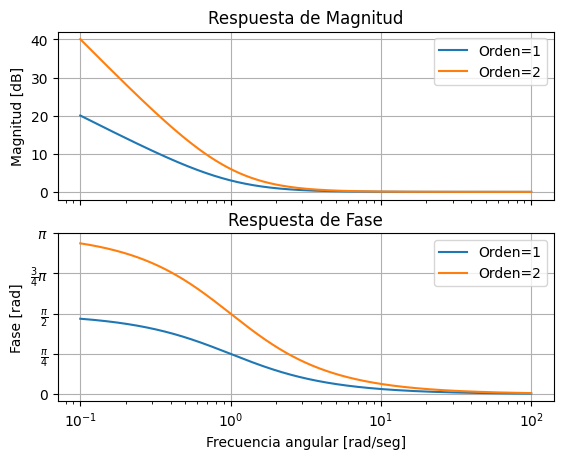

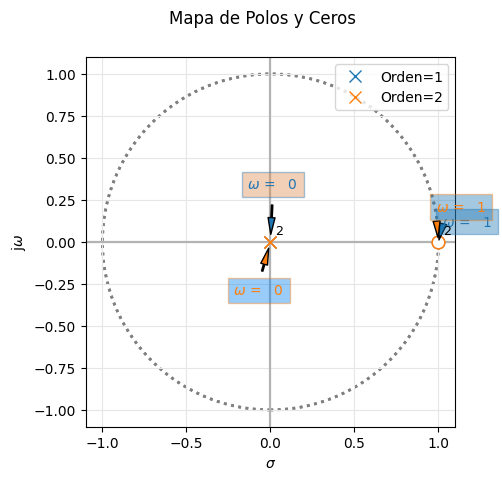

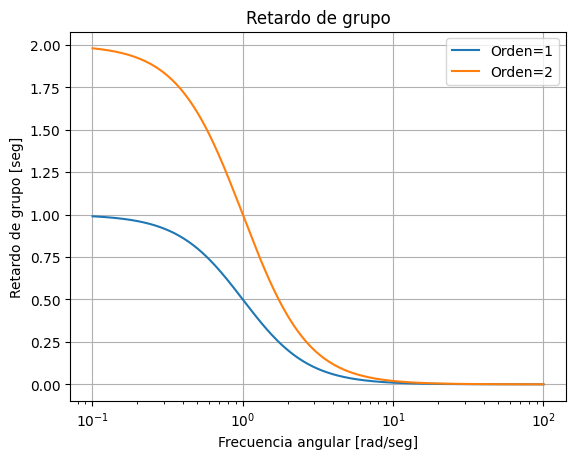

In [4]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import sympy as sp
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

# Gráficos interactivos
# %matplotlib ipympl
# Gráficos estáticos
#%matplotlib inline

from pytc2.sistemas_lineales import group_delay, analyze_sys, plot_plantilla
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s

from sympy import symbols, Matrix
from sympy import init_printing

from scipy.signal import TransferFunction
import matplotlib.pyplot as plt

# Librería de TC2, esta la vas a usar mucho
from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot

##############################################################################
# FILTRO DIFERENCIADOR
##############################################################################

all_sys = []
all_sys_desc = []

w0 = 1
qq = np.sqrt(2)/2 

# 1er Orden
my_tf = TransferFunction( [1 , -1], [1 , 0] )

all_sys += [my_tf]
all_sys_desc += ['Orden=1']

# 2do Orden
my_tf = TransferFunction( [1 , -2 , 1], [1 , 0 , 0] )

all_sys += [my_tf]
all_sys_desc += ['Orden=2']

# Visualizamos su respuesta en frecuencia
figaxes = analyze_sys(all_sys, all_sys_desc)

(3,
 <Axes: title={'center': 'Retardo de grupo'}, xlabel='Frecuencia angular [rad/seg]', ylabel='Retardo de grupo [seg]'>)

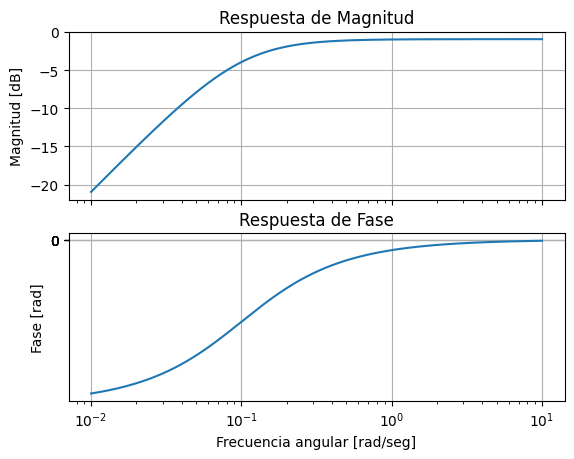

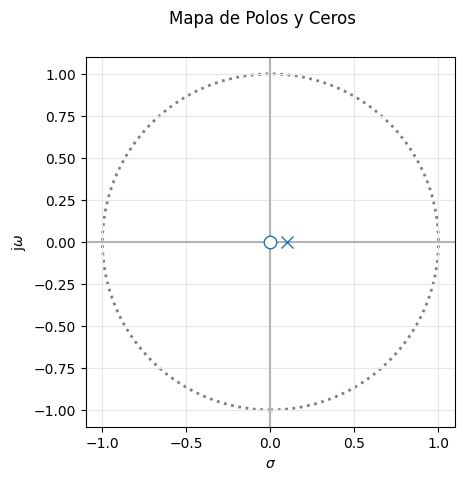

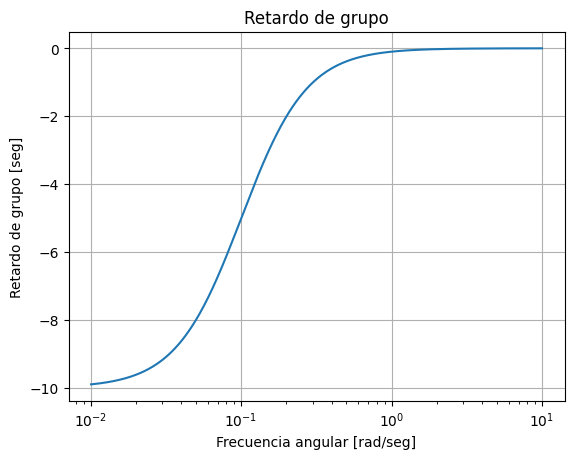

In [5]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# Librerías externas NumPy, SciPy y Matplotlib
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import numpy as np


# Librería de TC2, esta la vas a usar mucho
from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot


##############################################################################
# INTEGRADOR CON PERDIDAS
##############################################################################
w0 = 1
qq = np.sqrt(2)/2

my_tf = TransferFunction( [0.9 , 0], [1 , -0.1] )

plt.close('all')
bodePlot(my_tf, fig_id=1 )
pzmap(my_tf, fig_id=2) #Z plane pole/zero plot
GroupDelay(my_tf, fig_id=3)


(3,
 <Axes: title={'center': 'Retardo de grupo'}, xlabel='Frecuencia angular [rad/seg]', ylabel='Retardo de grupo [seg]'>)

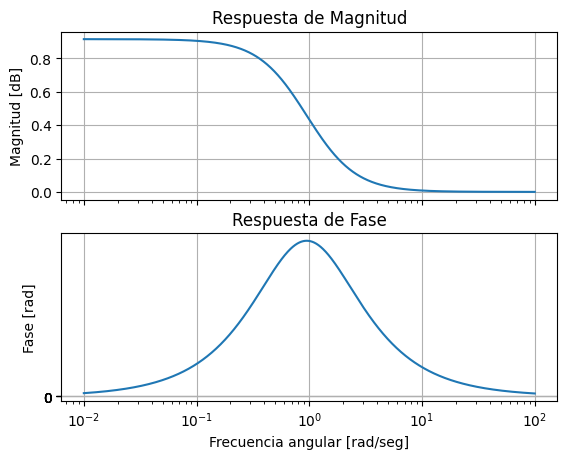

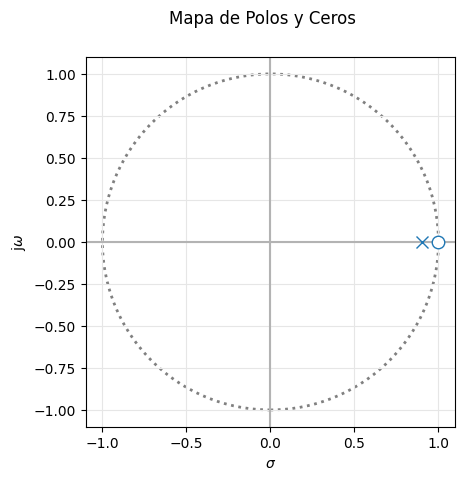

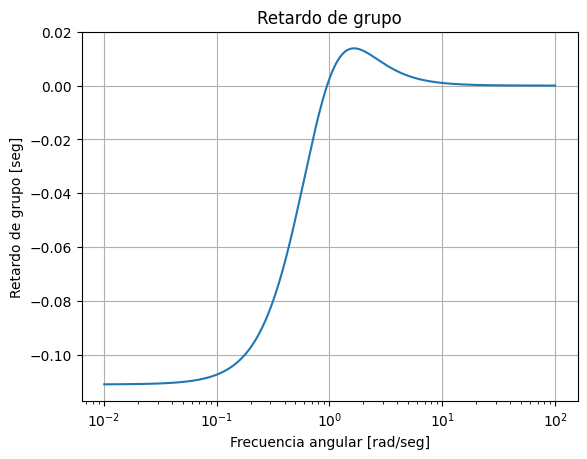

In [6]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import numpy as np


# Librería de TC2, esta la vas a usar mucho
from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot

##############################################################################
# FILTRO ELIMINA CONTINUA
##############################################################################
w0 = 1
qq = np.sqrt(2)/2

my_tf = TransferFunction( [1 , -1], [1 , -0.9] )

plt.close('all')
bodePlot(my_tf, fig_id=1 )
pzmap(my_tf, fig_id=2) #Z plane pole/zero plot
GroupDelay(my_tf, fig_id=3)


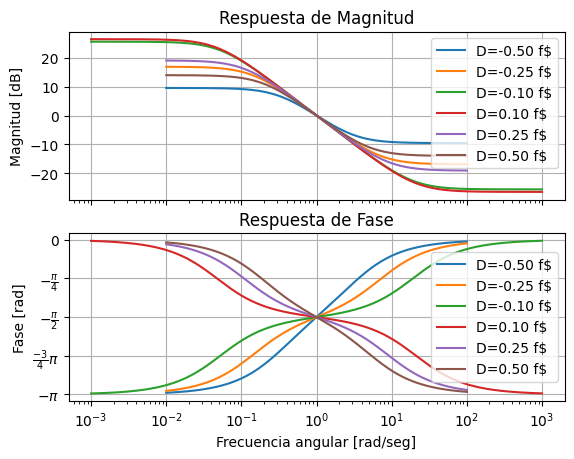

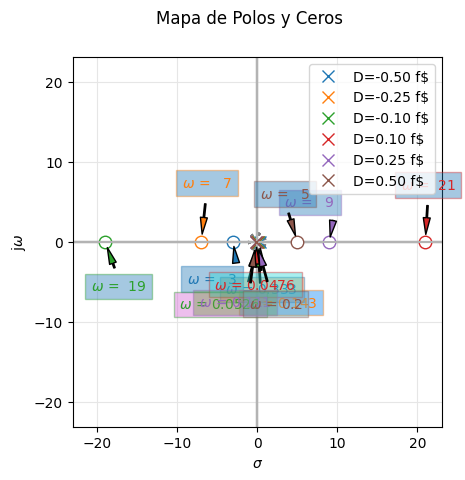

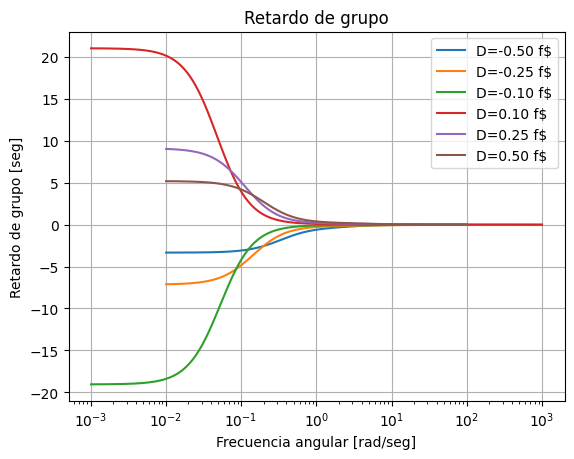

In [7]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-


# Librerías externas NumPy, SciPy y Matplotlib
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import numpy as np


# Librería de TC2, esta la vas a usar mucho
from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot

from pytc2.sistemas_lineales import group_delay, analyze_sys, plot_plantilla
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s

##############################################################################
# ejercicio 2 A
##############################################################################
w0 = np.pi*500
qq = np.sqrt(2)/2
alfa = 1

#my_tf = TransferFunction( [0.8 , 0 , 1], [1 , 0 , 0.8] )
#my_tf = TransferFunction( [1 , 0,0,0 , alfa] , [1-alfa , 0,0,0 , alfa-1] )
my_tf = TransferFunction( [1+alfa , 0,0,0 , alfa+1] , [1 , 0,0,0 , alfa])

plt.close('all')
bodePlot(my_tf, fig_id=1 )
pzmap(my_tf, fig_id=2) #Z plane pole/zero plot
GroupDelay(my_tf, fig_id=3)


# Visualizamos su respuesta en frecuencia
#figaxes = analyze_sys(my_tf, ['TF'])


### Simulacion SPYDER EJERCICIO 2

(3,
 <Axes: title={'center': 'Retardo de grupo'}, xlabel='Frecuencia angular [rad/seg]', ylabel='Retardo de grupo [seg]'>)

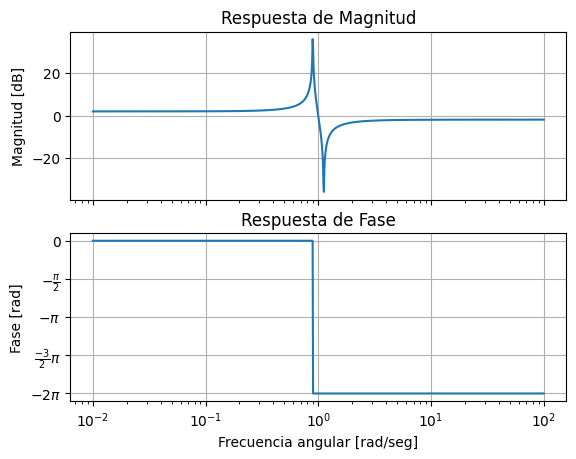

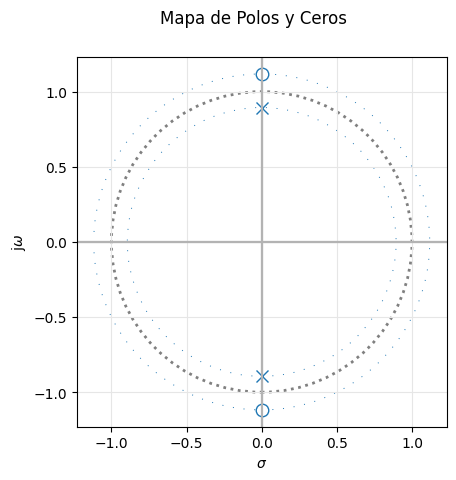

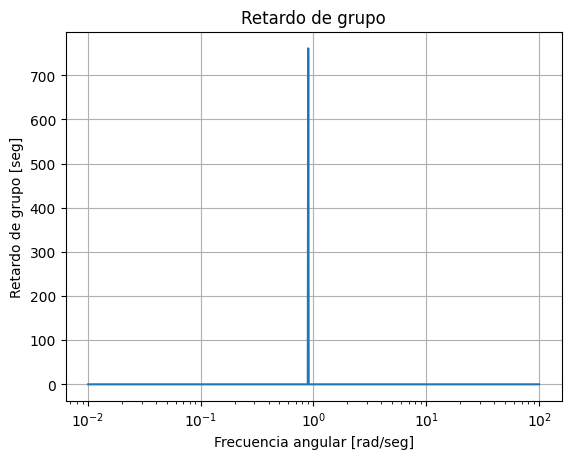

In [9]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# Librerías externas NumPy, SciPy y Matplotlib
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import numpy as np


# Librería de TC2, esta la vas a usar mucho
from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot

from pytc2.sistemas_lineales import group_delay, analyze_sys, plot_plantilla
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s

##############################################################################
# ejercicio 2 A
##############################################################################
w0 = np.pi*500
qq = np.sqrt(2)/2
alfa = 1

my_tf = TransferFunction( [0.8 , 0 , 1], [1 , 0 , 0.8] )

plt.close('all')
bodePlot(my_tf, fig_id=1 )
pzmap(my_tf, fig_id=2) #Z plane pole/zero plot
GroupDelay(my_tf, fig_id=3)


# Visualizamos su respuesta en frecuencia
#figaxes = analyze_sys(my_tf, ['TF'])


(3,
 <Axes: title={'center': 'Retardo de grupo'}, xlabel='Frecuencia angular [rad/seg]', ylabel='Retardo de grupo [seg]'>)

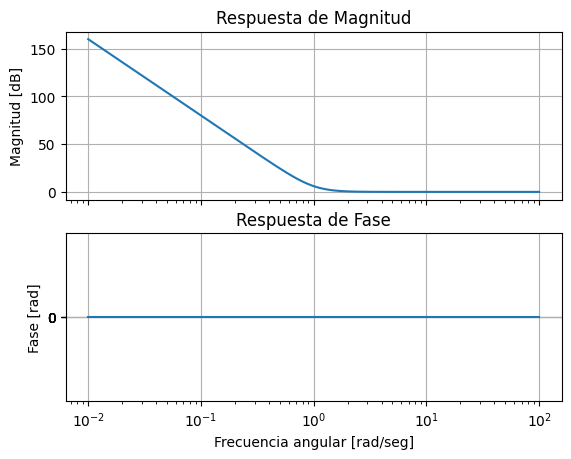

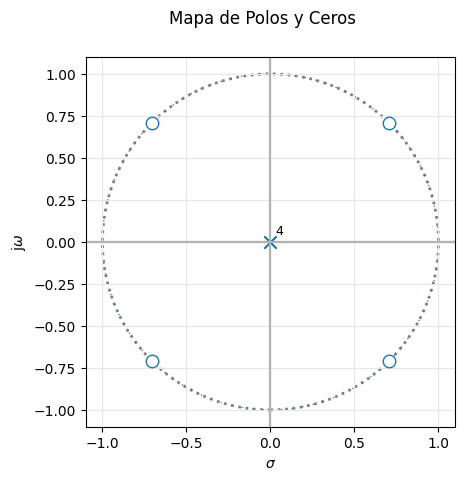

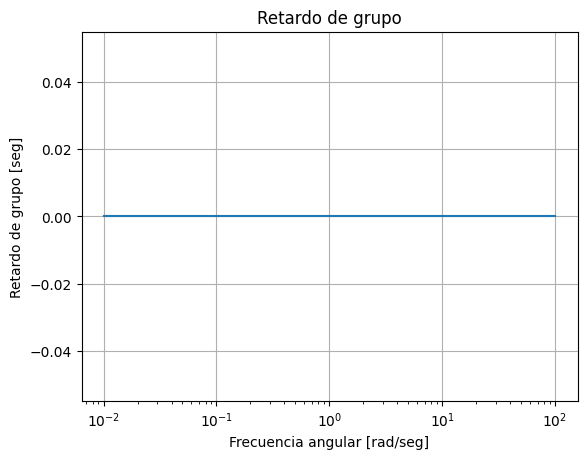

In [10]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# Librerías externas NumPy, SciPy y Matplotlib
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import numpy as np


# Librería de TC2, esta la vas a usar mucho
from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot

from pytc2.sistemas_lineales import group_delay, analyze_sys, plot_plantilla
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s

##############################################################################
# ejercicio 2 A
##############################################################################
w0 = 1
qq = np.sqrt(2)/2
alfa = 0

#my_tf = TransferFunction( [0.8 , 0 , 1], [1 , 0 , 0.8] )
#my_tf = TransferFunction( [1 , 0,0,0 , alfa] , [1-alfa , 0,0,0 , alfa-1] )
my_tf = TransferFunction( [1+alfa , 0,0,0 , alfa+1] , [1 , 0,0,0 , alfa])

plt.close('all')
bodePlot(my_tf, fig_id=1 )
pzmap(my_tf, fig_id=2) #Z plane pole/zero plot
GroupDelay(my_tf, fig_id=3)


# Visualizamos su respuesta en frecuencia
#figaxes = analyze_sys(my_tf, ['TF'])


## Conclusiones y Reflexiones
Al analizar filtros digitales y calcular H(Z), aprendimos que la respuesta en frecuencia es clave para entender cómo actúa un filtro. Los filtros FIR ofrecen una respuesta predecible y estable, mientras que los filtros IIR son más eficientes pero pueden ser menos estables. Las pruebas demostraron que la forma en que un filtro responde a diferentes frecuencias influye directamente en su desempeño. En general, comprender cómo se comporta cada filtro frente a diferentes frecuencias ayuda a diseñar sistemas más efectivos para el procesamiento de señales.